     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


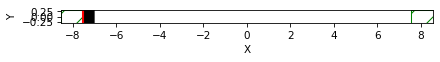

In [1]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3  # number of grating unit cells

# air region thickness adjacent to grating
dair = 14 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

k_point = mp.Vector3()

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

%matplotlib inline
plt.figure(dpi = 75)
sim.plot2D()
plt.show()

     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.6,0)
          size (0.6,0.15,1e+20)
          a

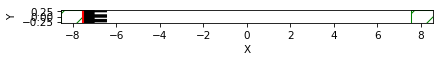

In [2]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2 ,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp + gp/2 ,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + 2*gp + gp/2,
            ),
        )
    )

%matplotlib inline
plt.figure(dpi = 75)
sim.plot2D()
plt.show()

In [3]:

sim.k_point = mp.Vector3()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000867128 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 500
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,

run 0 finished at t = 100.0 (100000 timesteps)
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.6

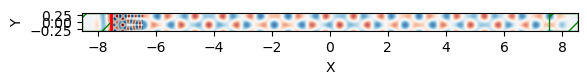

In [4]:
sim.run(until = 100)
plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [6]:
# 取得 Ez 場量在指定位置的振福資訊
amplitude_data = sim.get_array(component=mp.Ez)

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01 ##
y_obs_start = -0.5 * sy #+ gp/2

# 儲存振福資訊的列表
amplitude_list = []

# 遍歷每個觀測點
for j in range(300):
    y_obs = y_obs_start + (j * 0.002)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得振福資訊
    amplitude = np.abs(amplitude_data[x_index, y_index])
    amplitude_list.append(amplitude)
    
   
# 印出觀測點的振福資訊
'''
for j, amplitude in enumerate(amplitude_list):
    print(f"觀測點 {j+1} 的振福資訊: {amplitude/np.max(amplitude_list)}")'''

print(amplitude_list)

[0.11267673635995232, 0.10044771344102152, 0.08807652247619066, 0.07559722352600076, 0.063039164435524, 0.05041767040822355, 0.0377309861831823, 0.024964623996130753, 0.012100537241542097, 0.0008737516043765513, 0.013960577521869043, 0.027153841111860318, 0.04044509108585424, 0.05382963183580868, 0.06730845155355217, 0.08088444769133574, 0.09455514083792646, 0.10830665857668184, 0.1221136207429142, 0.13594653038711646, 0.14978387552754074, 0.1636227817113352, 0.17748175650840478, 0.1913923485626952, 0.20538201371329232, 0.2194554509806022, 0.23358348974517779, 0.24770604566974008, 0.26174962804998836, 0.27565308525677207, 0.28939095792709696, 0.3029841622574595, 0.316492783416659, 0.3299933292539379, 0.3435494678685651, 0.3571880293853154, 0.3708896813713062, 0.3845973328527483, 0.39823790530633174, 0.41174792756360834, 0.425092606250646, 0.4382716515692671, 0.45131126710504255, 0.4642474381358739, 0.4771085084119348, 0.48990409027922416, 0.5026235024942792, 0.5152422947395241, 0.52773

In [7]:

# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh +0.01
y_obs_start = -0.5 * sy #+ gp/2 

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(300):
    y_obs = y_obs_start + (j * 0.002)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs ) * sim.resolution))
    y_index = int(round((y_obs ) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

print(phase_list)
# 印出觀測點的相位資訊
'''
for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")'''

[0.005259333337758695, 0.01577800944450042, 0.02629671385410544, 0.036815465466576526, 0.04733428322469378, 0.05785318613818609, 0.06837219329862992, 0.07889132389683266, 0.08941059724691089, 0.09993003280031654, 0.11044965016711163, 0.1209694691365999, 0.13148950969591272, 0.1420097920585062, 0.1525303366651257, 0.16305116422857086, 0.17357229574680608, 0.18409375252306126, 0.1946155561923448, 0.2051377287428494, 0.2156602925508316, 0.22618327038944383, 0.236706685477083, 0.2472305614912323, 0.2577549225985655, 0.2682797934916147, 0.2788051994078008, 0.28933116620082455, 0.2998577203161612, 0.3103848888751929, 0.32091269968604963, 0.331441181313858, 0.3419703630815732, 0.35250027515799354, 0.36303094856572193, 0.3735624152621264, 0.38409470817106806, 0.39462786124480254, 0.4051619095292935, 0.41569688920088194, 0.42623283767702713, 0.4367697936300643, 0.44730779711186824, 0.4578468895881159, 0.46838711406473116, 0.47892851514451507, 0.4894711391300208, 0.500015034128032, 0.51056025014

'\nfor j, phase in enumerate(phase_list):\n    print(f"觀測點 {j+1} 的相位資訊: {phase}")'

In [ ]:
sim.reset_meep()
f = plt.figure(dpi = 125)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 70)
plt.close()

filename = "2 beta beta alpha structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)